In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error

import seaborn as sns

from sklearn.pipeline import make_pipeline

In [3]:
#dfd = pd.read_csv("CSVs\dfdd.csv")
#dfd.index = dfd['Unnamed: 0'].values
#del dfd['Unnamed: 0']

#dfc = pd.read_csv("CSVs\dfcc.csv")
#dfc.index = dfc['Unnamed: 0'].values
#del dfc['Unnamed: 0']

In [4]:
dfc = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/sraniestarni.csv')
dfc.index = dfc['Unnamed: 0'].values
del dfc['Unnamed: 0']

dfd = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/sraniestarnismerti.csv')
dfd.index = dfd['Unnamed: 0'].values
del dfd['Unnamed: 0']

dfdsr = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/dfdsrn.csv')
dfdsr.index = dfdsr['Unnamed: 0'].values
del dfdsr['Unnamed: 0']

dfcsr = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/dfcsrn.csv')
dfcsr.index = dfcsr['Unnamed: 0'].values
del dfcsr['Unnamed: 0']

In [5]:
#corlist = dfc.columns
#dfcsr = dfc.copy(deep=True)
#dfdsr = dfd.copy(deep=True)
#for i in corlist:
#    for j in range(706):
#        dfcsr[i].iloc[j] = (dfcsr[i].iloc[j]-min(dfcsr[i]))/(max(dfcsr[i])-min(dfcsr[i]))
#for i in corlist:
#    for j in range(706):
#        dfdsr[i].iloc[j] = (dfdsr[i].iloc[j]-min(dfdsr[i]))/(max(dfdsr[i])-min(dfdsr[i]))

In [6]:
dfc

,Afghanistan,Africa,Albania,Algeria,Angola,Argentina,Armenia,Asia,Australia,Austria,...,United Arab Emirates,United Kingdom,United States,Upper middle income,Uruguay,Uzbekistan,Venezuela,World,Zambia,Zimbabwe
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,19.0,20535.0,357.0,185.0,21.0,1690.0,419.0,74300.0,1249.0,7304.0,...,51.0,41574.0,61013.0,120138.0,279.0,212.0,473.0,506817.0,32.0,1082.0
704,14.0,14651.0,328.0,172.0,15.0,1294.0,327.0,89989.0,1285.0,5192.0,...,114.0,43361.0,34215.0,109532.0,104.0,228.0,785.0,423320.0,18.0,523.0
705,54.0,11032.0,172.0,193.0,0.0,2477.0,95.0,74170.0,1434.0,4625.0,...,48.0,51746.0,192917.0,98156.0,178.0,223.0,0.0,604208.0,15.0,0.0
706,9.0,20055.0,393.0,197.0,42.0,3089.0,240.0,83308.0,1705.0,4233.0,...,62.0,45473.0,108930.0,117084.0,237.0,147.0,543.0,688201.0,47.0,2555.0


In [7]:
dfcsr.drop(dfcsr.head(10).index,inplace=True)
dfcsr.drop(dfcsr.tail(10).index,inplace=True)

In [8]:
yaxis = dfcsr['Russia'].values
xaxis = [i for i in range(11,697)]

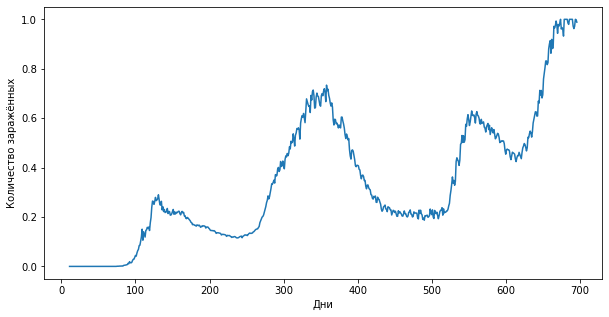

In [9]:
plt.figure(figsize=(10,5))
plt.plot(xaxis, yaxis)
plt.xlabel('Дни')
plt.ylabel('Количество заражённых')
plt.show()

In [10]:
xaxis1 = np.reshape(xaxis, (-1, 1))
lr.fit(xaxis1, yaxis)

LinearRegression()

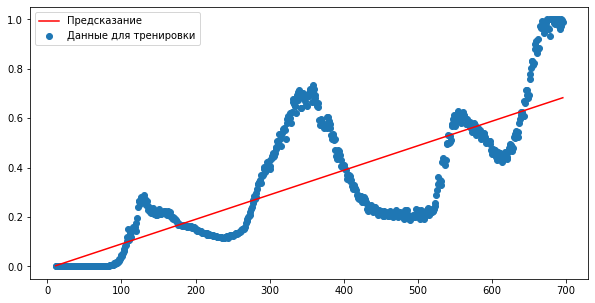

In [11]:
plt.figure(figsize=(10,5))
plt.scatter(xaxis, yaxis, label='Данные для тренировки')
plt.plot(xaxis,lr.predict(xaxis1), label='Предсказание', c='red')
plt.legend()
plt.show()

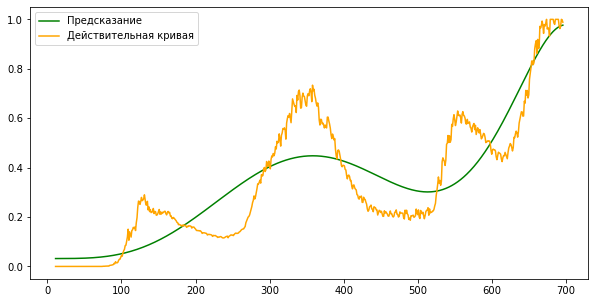

[ 0.00000000e+00 -1.15772234e-12 -2.38769185e-11 -2.06971691e-09
  3.64921358e-10 -1.76888315e-12  2.90165954e-15 -1.57907413e-18]
0.031956809554606114


In [44]:
rmses = []
#enumerate = [i for i in range(10)]
enumerate = [7]

for i in enumerate:
    p = PolynomialFeatures(i, include_bias=True)
    
    xaxis_poly = p.fit_transform(xaxis1)

    lr.fit(xaxis_poly, yaxis)

    xaxis_ = np.linspace(xaxis1.min(0), xaxis1.max(0), 686).reshape(686,1)
    y_pred_lr = lr.predict(p.transform(xaxis_))
    poly_mse = mean_squared_error(yaxis, y_pred_lr)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    plt.figure(figsize=(10,5))
#    plt.scatter(xaxis, yaxis, label='Данные для тренировки') #не вижу смысла проставлять точки, ибо они просто будут накладываться на кривую
    plt.plot(xaxis_, y_pred_lr, label='Предсказание', c='green')
    plt.plot(xaxis, yaxis, label='Действительная кривая', c='orange')
    plt.legend()
    plt.show()
    #print(p.fit_transform(xaxis_))
    modelo = make_pipeline(p, lr)
    print(modelo.steps[1][1].coef_)
    print(modelo.steps[1][1].intercept_)

In [46]:
print ('x', '**', 0, '*', 0.031956809554606114)
for i in range (1,8):
    print('x', '**', i, '*', modelo.steps[1][1].coef_[i])

x ** 0 * 0.031956809554606114
x ** 1 * -1.157722343844404e-12
x ** 2 * -2.3876918465293706e-11
x ** 3 * -2.069716912370412e-09
x ** 4 * 3.6492135772864587e-10
x ** 5 * -1.7688831475777119e-12
x ** 6 * 2.9016595374520656e-15
x ** 7 * -1.5790741342250807e-18


In [49]:
for x in range(686,700):
    a = x ** 0 * 0.031956809554606114
    a1 = x ** 1 * -1.157722343844404e-12
    a2 = x ** 2 * -2.3876918465293706e-11
    a3 = x ** 3 * -2.069716912370412e-09
    a4 = x ** 4 * 3.6492135772864587e-10
    a5 = x ** 5 * -1.7688831475777119e-12
    a6 = x ** 6 * 2.9016595374520656e-15
    a7 = x ** 7 * -1.5790741342250807e-18
    print(a + a1 + a2 + a3 + a4 + a5 + a6 + a7)

0.9596692165612097
0.9621763786308293
0.9645122989630011
0.966671887571934
0.9686499796806913
0.9704413350611532
0.9720406373704122
0.9734424934838017
0.9746414328242565
0.9756319066893724
0.9764082875731788
0.9769648684861778
0.9772958622709496
0.9773954009147303


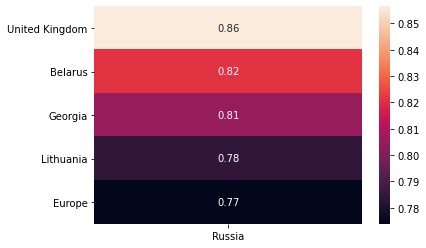

In [41]:
lisc = list(dfcsr.columns)
inp='Russia' #Afghanistan
inpcol=lisc.index(inp)
c = dfcsr.corr()
cd=c.iloc[:,[inpcol]]
cd=cd.sort_values(by=inp,ascending=False)
cd=cd[1:6]
sns.heatmap(cd,annot=True) # vmin=0,vmax=1
plt.show()

In [42]:
cd

,Russia
United Kingdom,0.856483
Belarus,0.821270
Georgia,0.805180
Lithuania,0.784234
Europe,0.773894


In [46]:
y = dfcsr['Russia'].values
Val = [dfcsr['United Kingdom'].values, dfcsr['Georgia'].values, dfcsr['Belarus'].values, dfcsr['Lithuania'].values, dfcsr['Europe'].values]

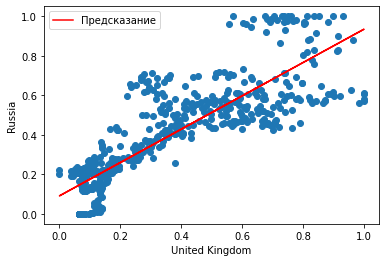

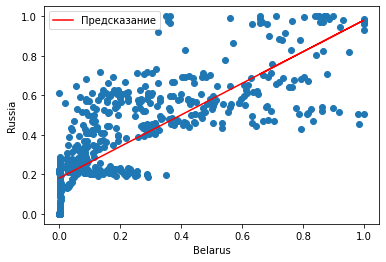

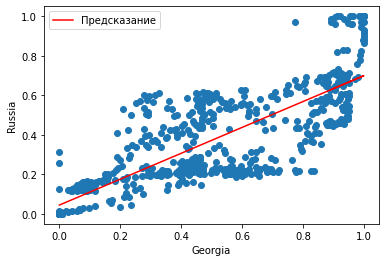

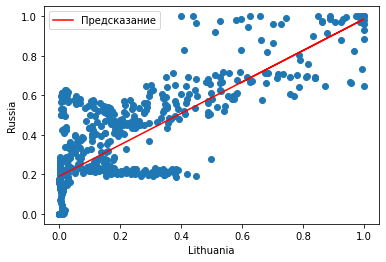

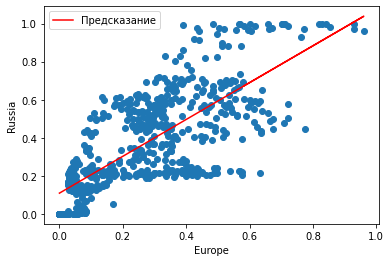

In [47]:
for i in range(5):
    x1p = np.reshape(Val[i], (-1, 1))
    lr.fit(x1p, y)
    plt.scatter(Val[i], y)
    plt.plot(x1p,lr.predict(x1p), label='Предсказание', c='red')
    plt.xlabel(cd.index[i])
    plt.ylabel('Russia')
    plt.legend()
    plt.show()

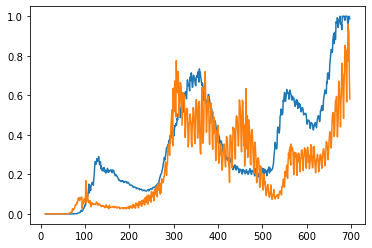

In [48]:
plt.plot(dfcsr['Russia'])
plt.plot(dfcsr['Europe'])
plt.show()